Image Classificaation using SVM is very efficient way of modelling and very rarely used algorithm for image processing and modelling..!!!!

**Importing the dataset**

In [1]:

import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [3]:
DATADIR = '../input/autistic-children-data-set-traintestvalidate/train'
CATEGORIES = ['autistic','non_autistic']
IMG_SIZE=100

Ex. of an sample image is shown below


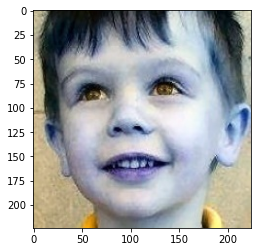

In [4]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break


performing preprocessing steps...::


In [5]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()            

In [6]:
print(len(training_data))

2536


storing trainig length for further use.

In [7]:
lenofimage = len(training_data)

for image to be trained we have to convert the image to a array form so,that our model can train on it...!!

and X should be of type (training_data_length , -1) because SVM takes 2D input to train

In [8]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)


In [9]:
X.shape

(2536, 30000)

**flattening the array**

In [10]:
X = X/255.0

Ex. of flattened array...

In [11]:
X[1]

array([0.89411765, 0.90588235, 0.9372549 , ..., 0.40784314, 0.37254902,
       0.34509804])

note : y should be in array form compulsory.


In [12]:
y=np.array(y)

In [13]:
y.shape

(2536,)

Now we are ready with our dependent and independent features, now its time for data modelling

applying train_test_split on our data

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)



**fitting our data in SVM model**

In [15]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**predicting the X_test**

In [16]:
y2 = svc.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.6656151419558359


Accuracy is 66.56 %


In [18]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.66      0.64      0.65       311
           1       0.67      0.69      0.68       323

    accuracy                           0.67       634
   macro avg       0.67      0.67      0.67       634
weighted avg       0.67      0.67      0.67       634



In [19]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [20]:
result


,original,predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
629,1,1
630,0,1
631,0,0
632,0,1
